# Conducción de calor en 1D estacionaria

### Mariana Aguilar Ramírez y Arturo Cruz López 
### Geofisica Matemática y Computacional
### Fecha de inicio: 9 de Septiembre de 2021
### Fecha de entrega: 1 de Octubre de 2021



### Modelo Conceptual

Para este problema se desea calcular la temperatura T en un dominio de una dimension y considerando un regimen estacionario, i.e, que no vería con el tiempo, para esto involucramos las leyes que rigen este fenomeno, la termodinamica.
En termodinámica se define al calor como la energía transferisa de un sistema a otro debido a la diferencia de temperatura entre ellos. La transferencia
de calor se puede presentar de diversas maneras y son: Conducción, convección y radiación
    
La conducción es la tranferencia de calor através de un material sólido y que sean buenos conductores de energía calorífica.
    
La convección es la transferencia de energía calorifica mediante la circulación y difusión de el medio calentado. El fluido o gas que este en contacto 
directo con la fuente de calor, aumentara su temperatu y a mayor temperatura menor densidad lo que provoca que estos tiendan a subir y por efecto de la
gravedad el medio frío tiende a bajar y es a lo que se le conoce como convección.
    
La radiación es la transferencia de energía calorífica por ondas electromagnéticas denominadas infrarrojas, para este tipo de transferencia de calor no
se tiene contacto directo con la fuente de calor.

Para este problema solamente se considerara una transferencia de calor por conducción.
    
Por otro lado tambien debemos de conocer el termino de conductividad termica, esta es la propiedad que tienen ciertos materiales para transmitir calor, si su conductividad termica es un alto rango esto quiere decir que el material es muy buen conductor de calor.
   
Por medio de ecuaciones de cambio se puede cuantificar el proceso de transferencia de calor y esto se puede utilizar para calcular la cantidad de energia transferida por unidad de tiempo, se le conoce como Ley de Fourier.


En general:

-El medio a estudiar será una barra con longitud L.

-Las fronteras estan limitadas del  lado derecho por TB y del lado izquierdo por TA.

-Existirá o no, la presencia de una fuente o sumidero afectado a la barra, segun sea el caso.

-k representa a conductividad termica de el material.

-El problema se estudiará en un dominio de una dimensión y considerando un regimen estacionario



### Modelo Matemático


Debido a la condicion de calor estacionaria en nestro modelo matematico se define como:

$$
- \frac{\partial }{\partial {x_j}}( k \frac{\partial T}{\partial{x_j}})= S
$$

Como, se estudiará un modelo unidimensional, trabajaremos con k= ctte, hasta que se indique lo contrario (en el modelo computacional 2):

$$
-k\frac{d^2T}{dx^2}=S
$$



Donde:
T es la temperatura 

S es ganancia (fuente) o pérdida (sumidero) de calor

k es la conductividad térmica 

x  en m 

## Modelo Numérico 


Para nuestro modelo numérico primero se hace la discretización del dominio

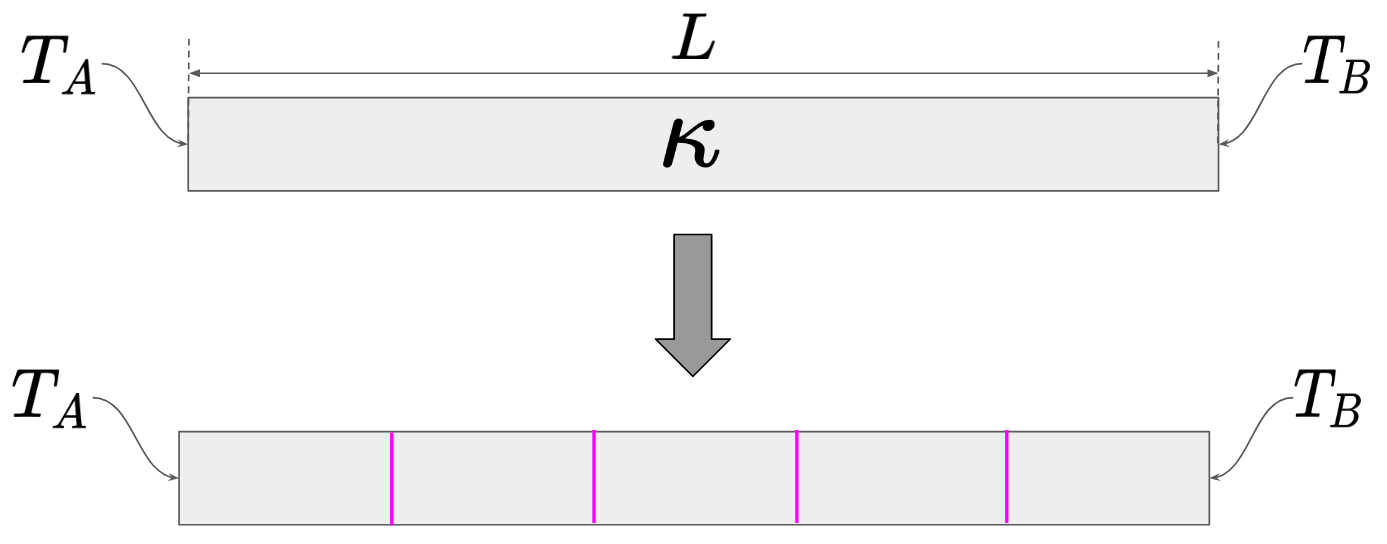

Nuestro dominio fue diidido en varios subdominios.

Se identificaran los lugares donde se desean calcular las temperaturas.

La intersección entre nuestros subdominios la denominaremos nodos (cuadros de color gris).

En cada uno de estos nodos se llevara a cabo el calculo.

Se denomira nodos espaciales a los que se ubican en las fronteras (cuadros de color blanco)
 -A dichos nodos se les imponen  las condiciones de frontera.


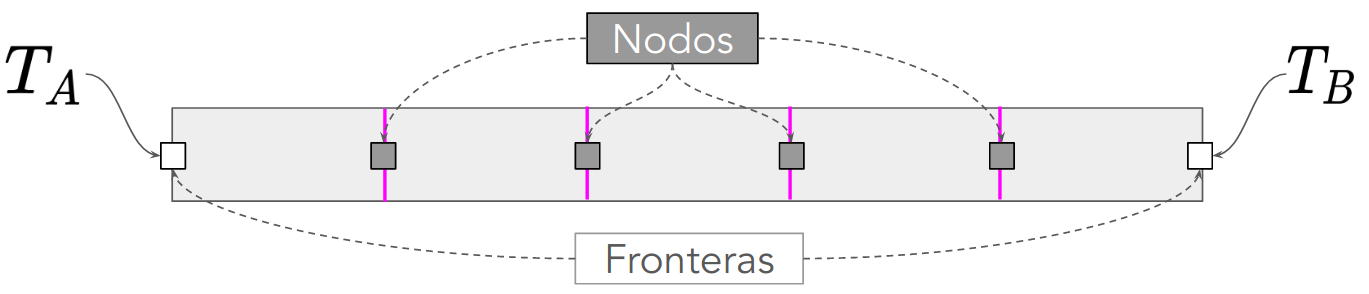

Numeramos los nodos 

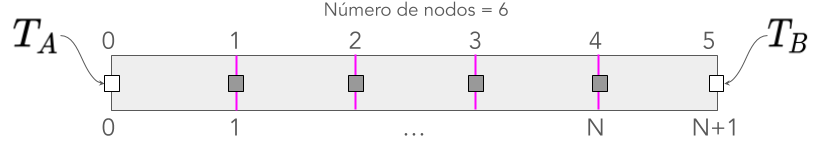

Dicha numeración comenzará en 0 

En los nodos donde se desea calcular la temperatura T son del 1 al N=4, por lo que tenemos 4 incógnitas que deseamos calcular.

Se identifica a las fronteras como $i$=0  e $i$=5 que se representa como $i$=N+1

Generamos en la discretización del dominio la malla del dominio, está define las coordenadas y la conectividad de los nodos si es el caso.


## Modelo Numérico: Ecuaciones

Recordando el modelo matemático

$$
-k\frac{d^2T}{dx^2}=S
$$

Se discretizará la ecuación utilizando diferencias finitas de segundo orden:
Se considera un nodo $i$ de la malla al igual que sus vecinos $i$+1 e $i$-1
Las celdas tienen una longitud $h$ entre ellas.

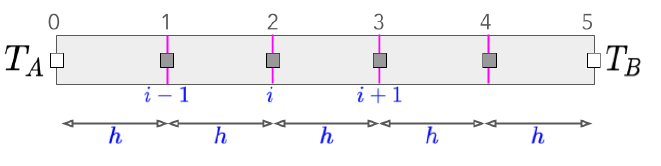

Al realizar la aproximación de la derivada y sustituirla en nuestra ecuación inicial, se obtiene la ecuación de conducción en el nodo $i$

$$
- k_i({\frac{T_i+1 -2T_i +T_i-1}{h^2}})= S_i
$$
tanto 
$$
k_i 
$$
como 
$$
S_i
$$
representan la conductividad termica y la fuente en el nodo $i$

si reescribimos esta ecuación obtenemos
$$
-r_i {T_{i-1}} + 2r_i  T_i - r_i T_{i+1} =S_i
$$
donde 
$$
r_i={\frac{k_i}{h^2}}
$$

Para nuestro caso deseamos calcular la temperatura en los nodos $i$=1,2,3,4 que son los nodos internos
Escribimos la ecuación para cada uno de ellos

$$
-r_1 T_0 + 2r_1 T_1 -r_1 T_2 =S_1
$$

$$
-r_2 T_1 + 2r_2 T_2 -r_2 T_3 =S_2
$$

$$
-r_3 T_2 + 2r_3 T_3 -r_3 T_4 =S_3
$$

$$
-r_4 T_3 + 2r_4 T_4 -r_4 T_5 =S_4
$$

Este sistema lineal se resolvera a obtener la temperatura en cada nodo 

Se modificaran las ecuaciones para incorporar las condiciones de frontera en los extremos $i$=1 e $i$=4
dando como resultado 

$$
2r_1 T_1 - r_1 T_2 = S_1 + r_1 T_A
$$

$$
-r_2 T_1 + 2r_2 T_2 -r_2 T_3 =S_2
$$

$$
-r_3 T_2 + 2r_3 T_3 -r_3 T_4 =S_3
$$

$$
-r_4 T_3 + 2r_4 T_4 = S_4 + r_4 T_B
$$

Por medio de un sistema lineal estas ecuaciones se van a resolver 

### Modelo Computacional

In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          #'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
def buildMatrix(N):
    """
    Matriz de ceros para almacenar el valor segun su posicion
    es una matriz cuadrada de NxN elementos, en las que en su parte exterior
    tendra diferentes valores a los que tenga en el interior
    """
    
    # Matriz de ceros
    A = np.zeros((N,N))
    
    """
    Parametros para definir la matriz.
    """
    
    # Primer renglon
    A[0,0] = 2
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Ultimo renglon
    A[N-1,N-2] = -1
    A[N-1,N-1] = 2
    
    return A

In [3]:
# Parametros fisicos
L = 1.0  #Longitud del medio 
TA = 1.0 # Frontera derecha 
TB = 0.0 # Frontera izquierda
k = 1.0 # Conductividad termica
S = 0.0 # Sumidero o fuente 

# Parametros numericos
N = 4
h = L / (N+1)
r = k /  h**2

In [4]:
#import matplotlib.pyplot as plt
# Arreglo para almacenar la solucion
T = np.zeros(N+2)
""""
Vector de ceros que almacenara los valores de la temperatura

"""

T[0] = TA #  Frontera izquierda 
T[-1] = TB # Frontera derecha

In [5]:
#print(T)

In [6]:
# Lado derecho del sistema
b= np.zeros(N)

b[:]= S / r # Fuente del sumidero
b[0] = T[0] # F Fcondicion de frontera
b[-1] = T[-1] #condicon de frontera

In [7]:
#print(b)

In [8]:
# Construccion d la  matrix
A = buildMatrix(N)

In [9]:
#print(A)

In [10]:
# Solucion del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

T = [1.  0.8 0.6 0.4 0.2 0. ]


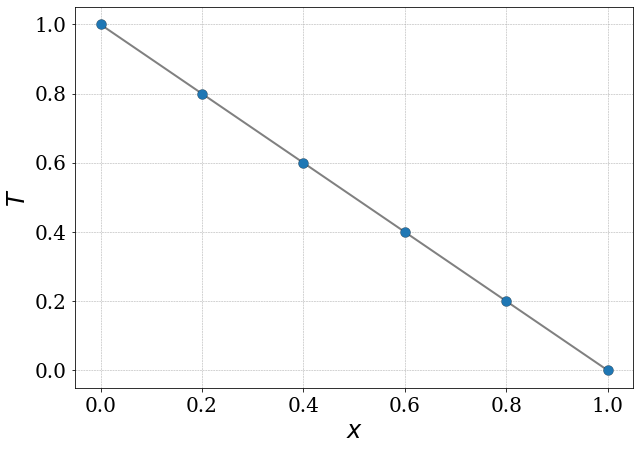

In [11]:
#Impresion y graficacion de la solucion 
print('T =',T)
x = np.linspace (0 , L , N +2)
plt.figure(figsize =(10 ,7))
plt.plot (x , T , c=  'grey' , lw =2.0)
plt.scatter (x , T , edgecolor = 'k', zorder = 10)
plt.xlabel ( '$x$')
plt.ylabel ('$T$')
plt.grid ()
#plot.savefig('grafica1.pdf')
plt.show ()

De acuerdo a como se presenta la grafica se puede decir que se esta trabajando con un sistema lineal, pero esta solucion nos da al no tener un sumidero o fuente, lo que hace que nuestra solución sea lineal, pero si el valor cambiara de 0 a otro numero esta grafica tendria un comportamiento cuafratico debido a la definicipon de nuestras ecuaciones 

## Solución analítica

In [12]:
def solExact(x, TA, TB, k, L, S):
    """
    Calculo de la solución exacta, en donde consta de los siguientes parametros:
    
    Tener en cuenta el caso que se este analizando, ya que en algun parametro el valor que se le pasara fungira
    como tipo array de cierto tamaño ( o también puede verse como una lista simple de # elementos)
    
    x representa la variable independiente
    TA representa el valor de la Frontera A (incial)
    TB representa el valor de la Frontera B (final)
    L es el longitud del nuestro medio (barra)
    k es la conductividad térmica de nuestro medio (barra)
    S representa el valor de una fuente o sumidero
    """
    return ((TB-TA)/L+(S/(2*k))*(L-x))*x+TA 

## Cálculo para la solución numérica

In [13]:
def solNum(L, N, k, S, A, b, T, etiqueta):
    h = L / (N+1)
    r = k / h**2
    """"
    Función que calcula la solucion numerica, que consta de los sig parametros
    en los cuales según sea el caso, se tendrá valores escalares y otros tipo array (o tipo lista con # elementos)
    
    L, longitud de la Barra, que segun sea el caso puede ser escalar o vectorial
    N, numero de muestras con la que se hará la aproximación
    k, conductivdad termica, que segun sea el caso puede ser escalar o vectorial
    S, fuente o sumidero, que segun sea el caso puede ser escalar o vectorial
    A, se le pasa la matriz generada por la función buildmatrix, de N dimensiones
    b, es el vector solucion que contiene a S/r más el vector de Temperaturas Frontera
    etiqueta, se le pasa la etiqueta correspondiente, segun los datos que se quieran obtner
    """
    
    # Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S / r # Fuente o sumidero 
    b[0] += T[0] # Condición de frotera
    b[-1] += T[-1] # Condición de frontera
    
    #Solucion del sistema lineal 
    T[1:N+1] = np.linalg.solve(A,b)
    
    #Impresion y grafica de la solución 
    x =  np.linspace(0, L, N+2)
    
    #Contrucción de la etiqueta de cada gráfica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)
        
    # Se grafican los puntos de la solución 
    plt.scatter(x, T, edgecolor='k', s=50, zorder=10, label=etiqueta)
    

## Función para la graficación 

In [14]:
def plotSol (title, filename):
    """"
    Funcion que se encarga de darle formato a cada impresion que se haga para el ejercicio 2
    
    Donde:
    Asigna un titulo con determinado tamaño de letra y posición al momento de ser ploteado
    Tiene asignaciones en el eje x 
    Tiene asignaciones en el eje y
    Asigna una leyenda, junto con un recuadro que se plotea fuera del grafico y permite una mejor visualización con'bbox'
    Además permite guardar una grafica mediante la asignación de un archivo en formato pdf con 'savefig'
    plt.show() muestra el resultado final con todos los elementos anteriores
    """
    plt.suptitle('Conduccion estacionaria',fontsize = 24, y = 0.94, va = 'center_baseline')
    plt.title(title, fontsize= 20, color='blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), fontsize = 12)
    plt.grid()
    plt.savefig(filename)
    plt.show ()

## Variar la longitud del dominio 

In [15]:
# Paramétros físicos
l =  [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0 
S = 1.0

# Parámetros numéricos
N = 10 

# Arreglo para almacenar la solución 
T = np.zeros(N+2)
T[0] = TA # Frontera izquiera 
T[-1] = TB # Frontera derecha



In [16]:
#Construcción de la matriz
A = buildMatrix(N)
#print(A)

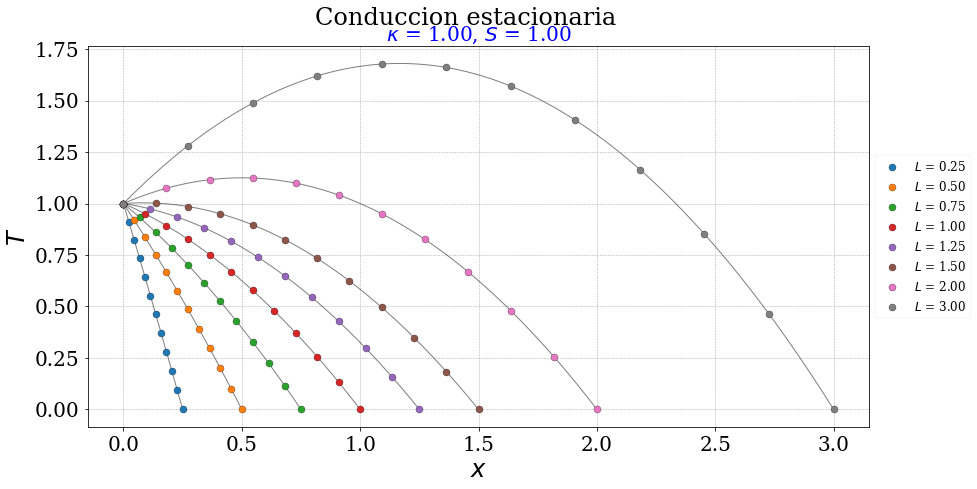

In [17]:
for L in l:
    solNum(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0,L,100)
    plt.plot(xe, solExact(xe, TA, TB, k, L, S), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$\kappa$ = {:3.2f}, $S$ = {:3.2f}'.format(k,S), 'L_variable.pdf')

Para la poder simular la representación de conducción estacionaria con la consideración de que la longitud es variante (i.e, que consideraremos diferentes tamaños de longitud de la barra), junto con el hecho de tenemos una conductividad termica de 1  y una fuente de 1, dicho k valor al ser differente de cero nos indica que nuestro medio tiene la capcidad de transferir calor. 

De modo que, en cuanto a la grafica podemos apreciar que entre menor longitud sea la longitud de nuestro medio, menor se verá el efecto que tiene la conduccion de calor al tener una fuente aplicada en cada particula dentro de él, por lo que se puede generalizar que el efecto del aumento o la respuesta de la temperatura será mayor al tener un medio con mayor longitud, mientras que un medio con longitudes muy pequeñas tendrá una respuesta termica casi inperceptiable en cuanto a su incremento.

Mientras que en cuanto a términos matemáticos, dicha respuesta de temperatura es de orden cuadrático debido a la presencia de la fuente con valor distinto de cero, ya que en nuestra nueva ecuacion de solucion análitica, es lo que permite obtner terminos cuadraticos que nos arrojen una curva de este modo.

## Variar la longitud del dominio 

In [18]:
# Paramétros físicos
l =1.0 
TA=1.0
TB=0.0
k=[0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]
S=1.0

# Parámetros numéricos
N = 10 

# Arreglo para almacenar la solución 
T = np.zeros(N+2)
T[0] = TA # Frontera izquiera 
T[-1] = TB # Frontera derecha

In [19]:
#Construcción de la matriz
A = buildMatrix(N)
#print(A)

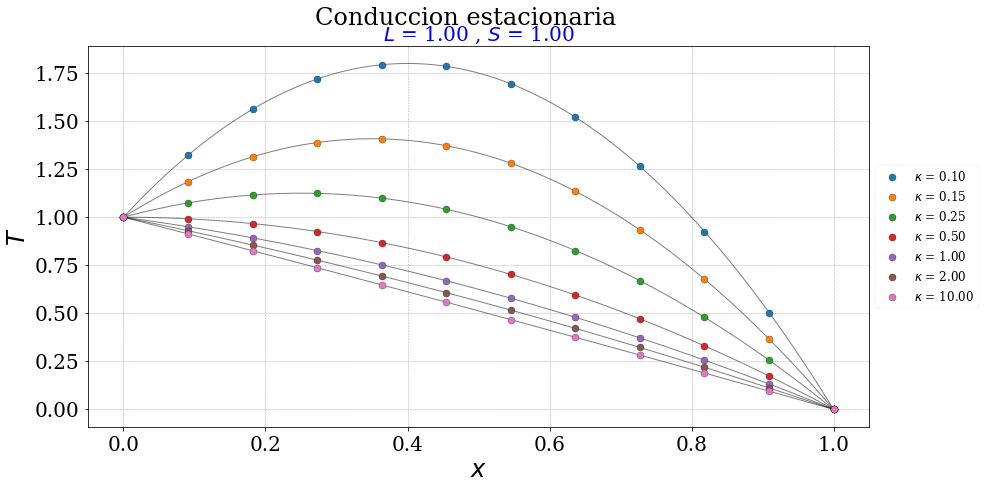

In [20]:
for K in k:
    solNum(l, N, K, S, A, b, T, 'k')
    xe = np.linspace(0,l,100)
    plt.plot(xe, solExact(xe, TA, TB, K, l, S), 'k', lw=1.0, alpha=0.5)
       

plotSol('$L$ = {:3.2f} ,'.format(l) + ' $S$ = {:3.2f}'.format(S), 'k_variable.pdf')

De manera similar al ejemplo pasado, ahora se tendra un cambio en la consideracion de los parametros fijos, en los cuales ahora simularemos la respuesta termica en funcion de la longitud de nuestro medio cuando k (conductividad termica) es variable, i.e , que simula la respuesta termica asociado a varios materiales. Lo cual, es bastante interesante ya que cada valor representará el qué tan bueno o qué tan malo es un material para poder transferir el calor. Y esto al estar asociado conforme varía la longitud de una barra a un metro, se tiene que el comportamiento para k pequeños, tienen un comportamiento curvo, mientras que entre mayor es el valor de k, se tiene un comportamiento lineal.

## Variar la longitud del dominio

In [21]:
# Paramétros físicos
l = 1.0
TA = 1.0
TB = 0.0
k = 1.0 
S = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]

# Parámetros numéricos
N = 10 

# Arreglo para almacenar la solución 
T = np.zeros(N+2)
T[0] = TA # Frontera izquiera 
T[-1] = TB # Frontera derecha

In [22]:
#Construcción de la matriz
A = buildMatrix(N)
#print(A)

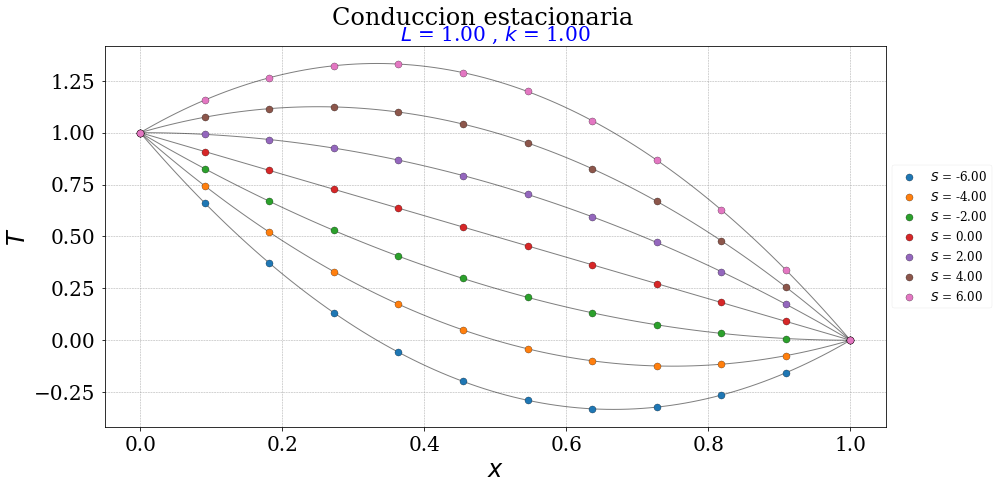

In [23]:
for s in S:
    solNum(l, N, k, s, A, b, T, 'S')
    xe = np.linspace(0,l,100)
    plt.plot(xe, solExact(xe, TA, TB, k, l, s), 'k', lw=1.0, alpha=0.5)
       

plotSol('$L$ = {:3.2f} ,'.format(l) + ' $k$ = {:3.2f}'.format(k), 's_variable.pdf')

Para nuestra ultima grafica se tomara una serie de valor que representen los casos cuando se tienen fuentes o sumideros, ya que el fenomeno físico que representa dicha grafica es el de ganancia de calor (en el caso cuando S es positivo) y el caso de perdida de calor (cuando S es negativo), entonces esto es,igual a que existe una relación en cuanto al decremento y al incremento.

De modo que, cuando S es igual a cero tendremos un comportamiento lineal; para S con +- 2, tendremos una variación con una tendencia curva baja simulando una lenta trasnferencia de calor; y para las S mayores o igual a 4, se tiene un comportamiento mas elevado de la perdida o ganancia por conducción de calor y todo esto analizado cuando se estudia el comportamiento de una barra con variaciones espaciales.

